# Statistics (continued...)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import scipy.stats as st

from ipywidgets import interact, FloatSlider, IntSlider

%matplotlib inline

## Last class

* Random variable:
  - A variable that takes a stochastic value from a set of possible outcomes.
  - A function of a random variable is a random variable.
* Statistic
  - A function of observations of a random variable.
  - Statistics are random variables.
* Model vs manifold of models
  - A model is a probability distribution over outcomes indexed by parameters.
  - A manifold of models is a class of models described by their parameter values.
* Likelihood function
  - The **likelihood function** for a manifold of statistical models is a function that maps values of the parameters and observations into the probability of having observed those observations given the parameters.
* Direct and inverse problems
  - The _direct problem_ is to draw a sample from a given model.
  - The inverse problem takes a given manifold of models and a sample generated from one of these models and infers which model from the manifold generated the data.
* Estimator
  - An estimator is a function that maps a sample into a model from a given manifold of models.
  - An estimator is a statistic, a statistic is a random variable, so estimators are random variables.
* Maximum likelihood
  - An estimator that is defined by finding the model that maximizes the likelihood function
  - Great because of the theoretical properties that it has: consistent, asymptotically normal, etc...


## This class

* Sufficient statistics
* Moment based estimators
* Estimate uncertainty
* Hypothesis testing and confidence intervals


## Sufficient Statistics

Let $T(\tilde{y})$ be a (potentially vector-valued) function of i.i.d. observations from a model.

A statistic $t = T(\tilde{y})$ is sufficient for the parameter $\theta$ if the conditional probability distribution $p(\tilde{y} | T(\tilde{y}; \theta)$ does not depend on the parameter $\theta$ for any value of $t$

**Example**

Consider $\tilde{y}$, $n$ i.i.d. observations drawn from the Bernoulli distribution with parameter $\theta$.

Let $T(\tilde{y}) \equiv \sum_{i=1}^n \tilde{y}_i$

Then

\begin{align*}
  p(\tilde{y}  | T(\tilde{y})=t) &= \frac{p(\tilde{y}, T(\tilde{y})=t)}{p(T(\tilde{y})=t)} \\
  &= \frac{p(\tilde{y}) \mathbb{1}_{T(\tilde{y})=t}}{p(T(\tilde{y})=t)} \\
  &= \frac{\mathbb{1}_{T(\tilde{y})=t} \theta^t (1 - \theta)^{n-t}}{{n\choose{t}} \theta^t (1 - \theta)^{n-t}} \\
  &= \frac{\mathbb{1}_{T(\tilde{y})=t}}{{n\choose{t}}}
\end{align*}


### Factorization theorem

It's not always easy to work with the raw definition of sufficient statistic. Luckily, there's a theorem that can help us:

**Theorem**: $T(\tilde{y})$ is sufficient for $\theta$ if and only if the joint pdf/pmf of $\tilde{y}$ can be factored as:

$$p(\tilde{y}; \theta) = h(\tilde{y}) g(T(\tilde{y}); \theta)$$

**Example**: Recall our manifold of models that described quarterly GDP growth. The manifold was described by

$$y = \theta + \varepsilon$$

where $\varepsilon \sim N(0, 1)$

Define $\bar{y} \equiv \frac{1}{n} \sum_{i=1}^n \tilde{y}_i$

Given a $\theta$, the probability density function of $Y$ is given by

\begin{align*}
  p(\tilde{y}) &= \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(\tilde{y}_i - \theta)^2}{2 \sigma^2} \right) \\
  &= \left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \theta)^2}{2 \sigma^2} \right) \\
  &= \left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \bar{y} + \bar{y} - \theta)^2}{2 \sigma^2} \right) \\
  &= \left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \bar{y})^2 + \sum_{i=1}^n (\bar{y} - \theta)^2 + 2 \sum_{i=1}^n (\tilde{y_i}\bar{y} - \theta \tilde{y}_i - 2 \bar{y}^2 + \bar{y}\theta)}{2 \sigma^2} \right) \\
  &= \left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \bar{y})^2 + \sum_{i=1}^n (\bar{y} - \theta)^2 - 2 \bar{y}\sum_{i=1}^n (\tilde{y}_i - \bar{y}) - 2 \theta \sum_{i=1}^n (\tilde{y}_i - \bar{y})}{2 \sigma^2} \right) \\
  &= \left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \bar{y})^2 + \sum_{i=1}^n (\bar{y} - \theta)^2}{2 \sigma^2} \right) \\
  &= \underbrace{\left(\frac{1}{2 \pi \sigma^2} \right)^{n/2} \exp \left( -\frac{ \sum_{i=1}^n (\tilde{y}_i - \bar{y})^2}{2 \sigma^2} \right)}_{h(\tilde{y})} \underbrace{\exp \left( \frac{-n (\bar{y} - \theta)^2}{2 \sigma^2} \right)}_{g(T(\tilde{y}); \theta)} \\
\end{align*}

**Sufficient vs minimally sufficient**

The statistic $T(\tilde{y}) = \tilde{y}$ is always sufficient, but this doesn't mean that it's useful...

Minimally sufficient is, loosely defined, as a sufficient statistic with the smallest possible cardinality (not unique!).

###  Helpful benefits of sufficient statistics (and  factorization)

**Data reduction: computation**

Since the maximum likelihood estimator is done by maximizing the likelihood function, if we can factorize the likelihood function into $h(\tilde{y})$ and $g(T(\tilde{y}); \theta)$ then to get the maximum likelihood estimator, we could optimize solely over $g$.

Occasionally $g$ will be simpler to optimize over... In the normal example above (with known standard deviation), it's obvious that the maximum likelihood estimate of $\theta$ will be $\bar{y}$.

**Data reduction: privacy**

If you can identify the sufficient statistics to generate an estimator for a model, then you don't necessarily need to receive the data!

Why is this helpful?

Helpful because there is lots of data that is protected by privacy concerns. For example, in the United States it is very difficult to gain access to government collected data on income due to concerns about privacy or data abuse, but it is (at least hypothetically) much easier to receive aggregated data because it would be difficult to reverse engineer the aggregation!

The reason it's harder is because many different data sets can generate the same aggregated numbers. If I chose 10 random numbers and added them together, could you identify the 10 numbers if I just told you their mean and the standard deviation of the numbers I chose?

## Moment Based Estimators

Moment based estimators don't explicitly rely on the likelihood function and can be written down in cases where the likelihood function is intractable.

When certain conditions are met, moment based estimators are consistent and asymptotically normally distributed.

Let $\tilde{y}$ be an $n$ element observation drawn from a model indexed by $m$ parameters $\theta$ from within a manifold of models described by $\Theta$.

### Method of moments

Let $Y$ be the random variable generated by the probability distribution $f(Y | \theta$).

Let $\mu_j \equiv E[Y^j] = g_j(\theta)$ be the j-th moment of $Y$ and $\hat{\mu_k} \equiv \frac{1}{n} \sum_{i=1}^n \tilde{y}_i^j$

then the method of moments estimators is $\hat{\theta} \in \Theta$ such that 

\begin{align*}
  \hat{\mu}_1  &= g_1(\hat{\theta}) \\
  \hat{\mu}_2 &= g_2(\hat{\theta}) \\
  &\dots \\
  \hat{\mu}_m &= g_m(\hat{\theta})
\end{align*}

This is a system of equations with $m$ equations and $m$ unknowns.

**Example: Uniform distribution**

Consider the uniform distribution on the interval $[a, b]$. If $Y \sim U(a, b)$ then

\begin{align*}
  \mu_1 &= E[Y] = \frac{1}{2}(a + b) \\
  \mu_2 &= E[Y^2] = \frac{1}{3}(a^2 + ab + b^2) \\
\end{align*}

Give $\tilde{y}$, we can compute the sample moments $\hat{\mu}_1$ and $\hat{\mu}_2$ and then solve these equations for $a$ and $b$ (the parameters) to get

\begin{align*}
  \hat{a} &= \hat{\mu}_1 - \sqrt{3 (\hat{\mu}_2 - \hat{\mu}_1^2)} \\
  \hat{b} &= \hat{\mu}_2 + \sqrt{3 (\hat{\mu}_2 - \hat{\mu}_1^2)}
\end{align*}

**Note**: The method of moments estimators are often relatively easy to compute which makes them a great "first try" estimator.

One place that this could be useful is if you are maximizing a complex likelihood that is not "well behaved" in particular regions. In a case like this, you might consider starting your optimization at the method of moments estimator to give the optimization algorithm a "hint".

In [2]:
a, b = 0.0, 2.0
n = 50
Y = st.uniform(a, b)

y = Y.rvs(n)

mu1_hat = np.mean(y)
mu2_hat = np.mean(y**2)

inner = 3*(mu2_hat - mu1_hat**2)
ahat = mu1_hat - np.sqrt(inner)
bhat = mu1_hat + np.sqrt(inner)

print(f"Parameters from model that generated data are {a} and {b}")
print(f"Method of moment estimators are {ahat} and {bhat}")

Parameters from model that generated data are 0.0 and 2.0
Method of moment estimators are 0.08670240306462673 and 1.999821179592848


In [3]:
def method_of_moments(moment_generator, data, theta_0):
    """
    Implements the method of moments
    
    Parameters
    ----------
    moment_generator : function
        Returns a vector of first m moments where
        m is the number of parameters
    data : np.array
        Observations that were generated by a model
        from within the manifold of models
    theta_0 : np.array(ndim=1, size=m)
        An initial guess for parameter values
        
    Returns
    -------
    sol.x : np.array(ndim=1, size=k)
        The parameters that solve the moment conditions
    """
    moments = np.array([np.mean(data**(k+1)) for k in range(len(theta_0))])
    find_root = lambda x: moment_generator(x) - moments
    sol = opt.root(find_root, theta_0)
    
    return sol.x

In [4]:
def uniform_moments(theta):
    mu_1 = 1/2 * (theta[0] + theta[1])
    mu_2 = 1/3 * (theta[0]**2 + theta[0]*theta[1] + theta[1]**2)
    return np.array([mu_1, mu_2])

In [5]:
ahat_n, bhat_n = method_of_moments(uniform_moments, y, np.array([0, 1]))

print(f"Parameters from model that generated data are {a} and {b}")
print(f"Numerical method of moment estimators are {ahat_n:0.2f} and {bhat_n:0.2f}")

Parameters from model that generated data are 0.0 and 2.0
Numerical method of moment estimators are 0.09 and 2.00


### Generalized method of moments estimator

Let $m(\theta) \equiv E [ g(\tilde{y}, \theta) ] = 0$ be a vector of $k$ "moment conditions" then the generalized method of moments (GMM) estimator is given by

$$\hat{\theta} = \text{arg}\min_{\theta \in \Theta} \left(\frac{1}{n} \sum_{i=1}^n g(\tilde{y}_i, \theta) \right)^T \hat{W} \left(\frac{1}{n} \sum_{i=1}^n g(\tilde{y}_i, \theta) \right)$$

where $\hat{W}$ is some positive semi-definite weighting matrix.

- $m$ parameters
- $n$ observations
- $k$ moments

**Which moments?**

In the method of moments, we were told to pick a particular set of moments (the first $m$ moments).

In the generalized method of moments, the choice of moments is up to us.

Picking the "right" moments is part art and part science:
  * You often want to choose moments related to the features of interest from the data.
  * Some individuals recommend to put moments in terms of "percentage error" so that each moment equation is in the same units
  * Likewise, one could choose to disproportionately weight moments that are of highest interest

**Choice of weight matrix**

How can we choose $\hat{W}$?

In some sense, it doesn't matter which $\hat{W}$ we choose because, as long as $\hat{W}$ is postitive semi-definite, then $\hat{\theta}$ will be consistent.

This means that one "easy" choice is the identity matrix.

However, there are benefits to choosing a "better" weighting matrix:

- Two-step feasible GMM:
  * Step 1: Take $W = I$ and compute a preliminary GMM estimate $\hat{\theta}_0$.
  * Step 2: Choose $W = \hat{W}_n(\hat{\theta}_0) \equiv \left(\frac{1}{n} \sum_{i=1}^n g(\tilde{y}, \hat{\theta}) g(\tilde{y}, \hat{\theta})^T \right)^{-1}$. $\hat{W}_n$ converges in probability to $\Omega^{-1}$ and therefore if we compute $\hat{\theta}$ using this estimate, then the estimator will be asymptotically efficient.
- Iterated GMM:
  * Similar to two-step feasible GMM, but iterate repeatedly until a convergence criterion is met.
  * Asymptotically, this estimator should be no better than two-step feasible GMM, but, there is some evidence that it performs better with finite samples.

In [6]:
def gmm_criterion(g, data, W, theta):
    # Make sure data is a row vector
    data = data[None, :]

    # Compute the mean across data
    ghat = np.mean(g(data, theta), axis=1)

    # Return weighted sum
    return ghat.T @ W @ ghat


def gmm(g, data, W, theta_0):
    """
    Implements the method of moments
    
    Parameters
    ----------
    g : function
        Returns a k-shape vector of moments of interest given
        data and parameters as an input
    data : np.array
        Observations that were generated by a model
        from within the manifold of models
    theta_0 : np.array(ndim=1, size=m)
        An initial guess for parameter values
        
    Returns
    -------
    sol.x : np.array(ndim=1, size=k)
        The parameters that solve the moment conditions
    """
    # Define function to minimize
    min_me = lambda theta: gmm_criterion(g, data, W, theta)

    sol = opt.minimize(min_me, theta_0, method="nelder-mead")

    return sol

**Example: Test scores**

This example is based on a [notebook by Rick Evans](https://notes.quantecon.org/submission/5b3b1856b9eab00015b89f90) on the QuantEcon Notes site.

The data comes from a year of test scores for an intermediate macroeconomics course. The maximum possible score on the test was 450 and minimum possible score was 0.

We will assume that these scores were generated from a truncated normal distribution. Let $\theta = \begin{bmatrix} \mu & \sigma \end{bmatrix}$ where

* $a = 0$ be the minimum value the trunctated normal random variable can take
* $b = 450$ be the maximum value the trunctated normal random variable can take
* $\mu$ be the mean of the non-truncated normal random variable
* $\sigma$ be the standard deviation of the non-truncated normal random variable


In [7]:
def create_truncnorm(a, b, mu, std):
    """
    Automates creating a truncated normal random
    variable where mu and std are the mean and
    standard deviation of the original normal random
    variable and a and b are the lower and upper bounds
    of the truncated normal
    """
    a_sp, b_sp = (a - mu) / std, (b - mu) / std

    return st.truncnorm(a=a_sp, b=b_sp, loc=mu, scale=std)

In [8]:
test_scores = np.loadtxt("Econ381totpts.txt")

In [9]:
def plot_scores(data, mu, std):

    xvals = np.linspace(-10.0, 500, 5000)
    tn = create_truncnorm(0.0, 450.0, mu, std)

    fig, ax = plt.subplots(figsize=(10, 8))

    ax.hist(test_scores, bins=25, density=True)
    ax.plot(xvals, tn.pdf(xvals))

    ax.set_xlim(-10, 475)
    ax.set_ylim(0.0, 0.009)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_title("Empirical distribution of test scores")
    ax.set_xlabel("Scores")
    ax.set_ylabel(r"$f(y | \theta)$")

    ax.annotate(f"$\mu = {mu:0.2f}$", (50, 0.006))
    ax.annotate(f"$\sigma = {std:0.2f}$", (50, 0.005))

    return fig, ax

interact(
    lambda mu, std: plot_scores(test_scores, mu, std),
    mu=FloatSlider(value=200.0, min=0.0, max=550.0, step=50.0),
    std=FloatSlider(value=50.0, min=50.0, max=150.0, step=10.0)
)

interactive(children=(FloatSlider(value=200.0, description='mu', max=550.0, step=50.0), FloatSlider(value=50.0…

<function __main__.<lambda>(mu, std)>

**Choosing a $g$**

Let's start by choosing a $g$ function that computes the difference between the theoretical mean/variance and the sample mean/variance.

$$g(\tilde{y}_i, \theta) = \begin{bmatrix} (\tilde{y}_i - \hat{\mu}) \\ (\tilde{y}_i - \hat{\mu})^2 - \hat{\sigma}^2 \end{bmatrix}$$

In [10]:
def mv_g(data, theta):
    """
    Computes mean and variance criterion
    """
    # Theoretical mean/std
    mu, std = theta
    tn = create_truncnorm(0.0, 450.0, mu, std)

    # Compute g
    return np.vstack([data - mu, (data - mu)**2 - std**2])


In [11]:
gv_sol = gmm(mv_g, test_scores, np.eye(2), np.array([250.0, 50.0]))

mu, std = gv_sol.x
tn = create_truncnorm(0.0, 450.0, mu, std)

print(f"Solution is mu={gv_sol.x[0]:0.2f} and std={gv_sol.x[1]:0.2f}")
print(f"Mean and variance of data is {np.mean(test_scores)} and {np.var(test_scores)}")
print(f"Mean and variance of model is {tn.mean():0.2f} and {tn.var():0.2f}")

Solution is mu=341.91 and std=88.48
Mean and variance of data is 341.90869565217395 and 7827.997292398056
Mean and variance of model is 323.11 and 5432.03


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Empirical distribution of test scores'}, xlabel='Scores', ylabel='$f(y | \\theta)$'>)

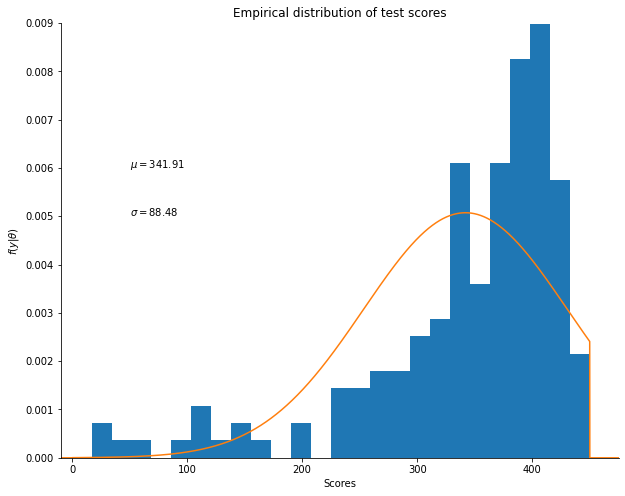

In [12]:
plot_scores(test_scores, mu, std)

In [13]:
def mv_g_err(data, theta):
    """
    Computes mean and variance criterion
    """
    # Theoretical mean/std
    mu, std = theta
    tn = create_truncnorm(0.0, 450.0, mu, std)

    # Compute g
    return np.vstack([(data - mu) / mu, ((data - mu)**2 - std**2) / std**2])

In [14]:
gv_sol_err = gmm(mv_g_err, test_scores, np.eye(2), np.array([500.0, 150.0]))

mu, std = gv_sol_err.x
tn = create_truncnorm(0.0, 450.0, mu, std)

print(f"Solution is mu={gv_sol_err.x[0]:0.2f} and std={gv_sol_err.x[1]:0.2f}")
print(f"Mean and variance of data is {np.mean(test_scores)} and {np.var(test_scores)}")
print(f"Mean and variance of model is {tn.mean():0.2f} and {tn.var():0.2f}")

Solution is mu=341.91 and std=88.48
Mean and variance of data is 341.90869565217395 and 7827.997292398056
Mean and variance of model is 323.11 and 5432.03


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Empirical distribution of test scores'}, xlabel='Scores', ylabel='$f(y | \\theta)$'>)

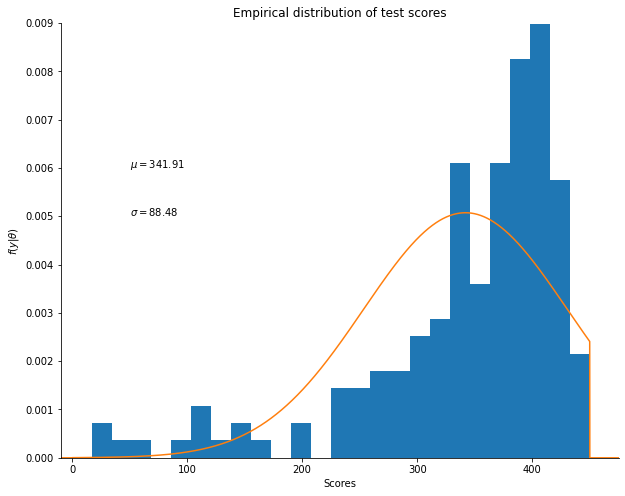

In [15]:
plot_scores(test_scores, mu, std)

**Choosing a $g$**

Now can we do better with different moments? Let's try the fraction of scores in multiple buckets $\{ [0, 100], (100, 200], (200, 300], (300, 400], (400, 450] \}$ and label the fraction of scores in each bucket as $b_{\text{bucket}}$.

$$g(\tilde{y}_i, \theta) = \begin{bmatrix} \tilde{y}_i \in \text{bucket} - b_{[0, 100]} \\ \tilde{y}_i \in \text{bucket} - b_{(100, 200]} \\ \tilde{y}_i \in \text{bucket} - b_{(200, 300]} \\ \tilde{y}_i \in \text{bucket} - b_{(300, 400]} \\ \tilde{y}_i \in \text{bucket} - b_{(400, 450]} \end{bmatrix}$$

In [16]:
def bucket_g(data, theta):
    """
    Computes mean and variance criterion
    """
    # Theoretical mean/std
    mu, std = theta
    tn = create_truncnorm(0.0, 450.0, mu, std)

    # Theoretical moments
    lbs = [0, 100, 200, 300, 400]
    ubs = [100, 200, 300, 400, 450]
    nbuckets = len(lbs)
    bucket_moments = np.array(
        [tn.cdf(ubs[i]) - tn.cdf(lbs[i]) for i in range(nbuckets)]
    )

    # Compute g
    return np.vstack(
        [
            ((data<ubs[i]) & (data>=lbs[i])).astype(int) - bucket_moments[i]
            for i in range(nbuckets)
        ]
    )

In [17]:
bucket_sol = gmm(bucket_g, test_scores, np.eye(5), np.array([500.0, 150.0]))

mu, std = bucket_sol.x
tn = create_truncnorm(0.0, 450.0, mu, std)

print(f"Solution is mu={bucket_sol.x[0]:0.2f} and std={bucket_sol.x[1]:0.2f}")
print(f"Mean and variance of data is {np.mean(test_scores)} and {np.var(test_scores)}")
print(f"Mean and variance of model is {tn.mean():0.2f} and {tn.var():0.2f}")

Solution is mu=403.94 and std=93.07
Mean and variance of data is 341.90869565217395 and 7827.997292398056
Mean and variance of model is 356.31 and 4198.13


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Empirical distribution of test scores'}, xlabel='Scores', ylabel='$f(y | \\theta)$'>)

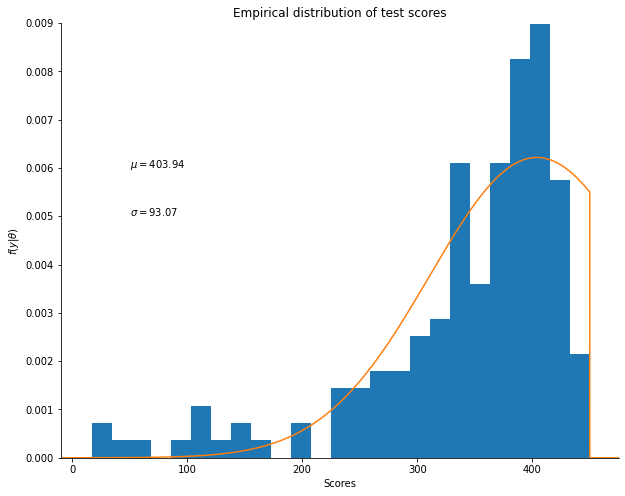

In [18]:
plot_scores(test_scores, mu, std)

### Simulated method of moments

Both the method of moments and the generalized method of moments require that one is able to directly evaluate theoretical moment functions... When this is not possible, one can use the simulated method of moments.

In generalized method of moments, computed

$$g(\theta_0) \equiv E[g(\tilde{y}, \theta_0)] = 0$$

using theoretical moments (i.e. $\tilde{y}_i - \mu(\theta)$).

As the name suggests, simulated method of moments replaces the theoretical computation with data simulated from a model.


**Algorithm**

1. Choose moments to compute and compute the corresponding moments in the "observed data"
2. Optimize with respect to $\hat{\theta}$ by
  - Propose $\hat{\theta}$
  - Simulate observations from model $f(\tilde{y} | \hat{\theta}))$
  - Compute moments on the simulated data in the same way that you did for the observed data
  - If sufficiently close, finish, otherwise find new proposal

In [19]:
def smm_criterion(g, data, W, theta):
    # Create model for given theta
    mu, std = theta
    tn = create_truncnorm(0.0, 450.0, mu, std)

    # Draw new samples
    np.random.seed(61089)
    sim = tn.rvs(10_000)

    # Compute difference in the data and simulated
    # moments
    ghat = (g(data) - g(sim))

    # Return weighted sum
    return ghat.T @ W @ ghat


def smm(g, data, W, theta_0):
    """
    Implements the method of moments
    
    Parameters
    ----------
    g : function
        Returns a k-shape vector of moments of interest given
        data as an input
    data : np.array
        Observations that were generated by a model
        from within the manifold of models
    theta_0 : np.array(ndim=1, size=m)
        An initial guess for parameter values
        
    Returns
    -------
    sol.x : np.array(ndim=1, size=k)
        The parameters that solve the moment conditions
    """
    # Define function to minimize
    min_me = lambda theta: smm_criterion(g, data, W, theta)

    sol = opt.minimize(min_me, theta_0, method="nelder-mead")

    return sol

In [20]:
def g_moments(data):
    return np.array([np.mean(data), np.var(data)])

In [21]:
sol_smm = smm(g_moments, test_scores, np.eye(2), np.array([200.0, 100.0]))

mu, std = sol_smm.x
tn = create_truncnorm(0.0, 450.0, mu, std)

print(f"Solution is mu={sol_smm.x[0]:0.2f} and std={sol_smm.x[1]:0.2f}")
print(f"Mean and variance of data is {np.mean(test_scores)} and {np.var(test_scores)}")
print(f"Mean and variance of model is {tn.mean():0.2f} and {tn.var():0.2f}")

Solution is mu=594.20 and std=190.43
Mean and variance of data is 341.90869565217395 and 7827.997292398056
Mean and variance of model is 341.69 and 7737.00


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Empirical distribution of test scores'}, xlabel='Scores', ylabel='$f(y | \\theta)$'>)

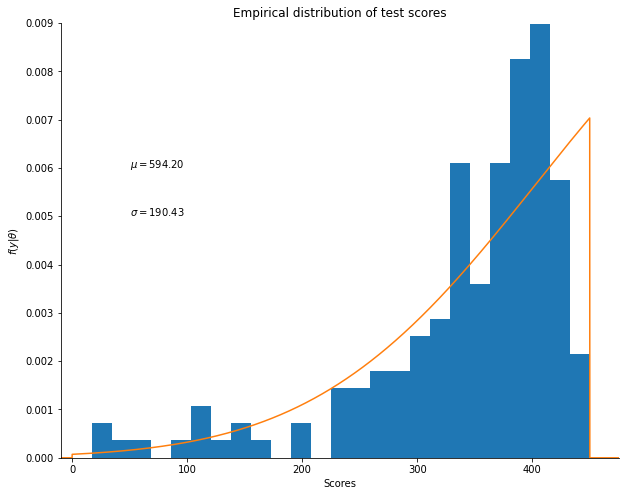

In [22]:
plot_scores(test_scores, mu, std)

## Estimate Uncertainty

We've emphasized that parameter estimates, $\hat{\theta}$, are random variables, but we've really only talked about the "point estimates" so far.

What probability distribution is associated with $\hat{\theta}$?

Multiple ways to proceed:

* Asymptotic normality
* Bootstrapping


### Asymptotic normality (of the maximum likelihood estimate)

Asymptotic comes from the central limit theorem (CLT) which states,

> Suppose $\tilde{y}$ is a sequence of $n$ of independent and identically distributed random variables drawn from $Y$. Let $E[y] = \mu < \infty$ and $V[y] = \sigma^2 < \infty$ then as $n \rightarrow \infty$, the random variable $\frac{\sqrt{n}}{\sigma}(Y - \mu)$ converges in distribution to $N(0, 1)$

Since $\hat{\theta}$ is a random variable with finite mean and variance (given certain regularity conditions) then as $n \rightarrow \infty$, $\frac{\sqrt{n} (\hat{\theta} - \theta)}{\sigma} \sim N(0, 1)$

**Score function and Fisher information**

Let $f(Y | \theta)$ be the probability density function for the random variable $Y$, then the _score_ is the gradient of the log-likelihood function.

$$s(\theta) = \frac{\partial \log \mathcal{L}(\theta; \tilde{y})}{\partial \theta}$$


The _Fisher information_ is defined to be

$$I_n(\theta) = V_{\theta} \left( \sum_{i=1}^n s(\tilde{y}_i) \right) = \sum_{i=1}^n V_{\theta} (s(\tilde{y}_i; \theta))$$

Furthermore,

$$I_n(\theta) = n I(\theta)$$

and

$$I(\theta) = -E_{\theta} \left( \frac{\partial^2 \log f(Y | \theta)}{\partial \theta^2} \right)$$

**Asymptotic Normality of the MLE**:

> Let $\text{se} = \sqrt{V(\hat{\theta}_n)}$. Under appropriate regularity conditions, the following hold:
>
>1. $\text{se} \approx \sqrt{1 / I_n(\theta)}$ and $\frac{\hat{\theta}_n - \theta}{\text{se}} \rightarrow N(0, 1)$
>2. Let $\hat{\text{se}} = \sqrt{1 / I_n(\hat{\theta})}$ then $$\frac{(\hat{\theta}_n - \theta)}{\hat{\text{se}}} \rightarrow N(0, 1)$$

**Example**:

Let $\tilde{y}$ be $n$ elements generated from a Bernoulli random variable. The MLE is given by

$$\hat{p}_n = \sum_i \frac{\tilde{y}_i}{n}$$

and $$f(\tilde{y}_i; p) = p^{\tilde{y}_i} (1 - p)^{1 - \tilde{y}_i}$$

then $$log(\tilde{y} | p) = \tilde{y}_i \log(p) + (1 - \tilde{y}_i) \log(1 - p)$$


\begin{align*}
  s(p; \tilde{y}_i) &= \frac{\tilde{y}_i}{p} + \frac{1 - \tilde{y}_i}{1 - p} \\
  -s'(p; \tilde{y}_i) &= \frac{\tilde{y}_i}{p^2} + \frac{1 - \tilde{y}_i}{(1 - p)^2} \\
\end{align*}

then note

\begin{align*}
  I(p) &= E[-s'(p; \tilde{y}_i)] \\
  &= \sum -s'(p; y) f(y; p) \\
  &= \frac{p}{p^2} + \frac{1 - p}{(1 - p)^2} \\
  &= \frac{1}{p (1-p)}
\end{align*}

and

\begin{align*}
  \hat{\text{se}} &= \sqrt{1 / I_n(\hat{p})} \\
  &= \sqrt{1 / (n I(\hat{p})} \\
  &= \left( \frac{\hat{p} (1 - \hat{p})}{n} \right)^{\frac{1}{2}}
\end{align*}

### Bootstrapping

Bootstrapping leverages the fact that, given $\hat{\theta}$, one can sample data

Given a point-estimate, $\hat{\theta}$ the bootstrap estimator of $\hat{\text{se}}$ is generated by:

1. Simulate $n$ observations of data $\tilde{y}_j$
2. Compute $\hat{\theta}(\tilde{y}_j)$
3. Compute $\hat{\text{se}} = \frac{1}{n} \sum_{j=1} (\hat{\theta}(\tilde{y}_j) - \hat{\theta})^2$

## Hypothesis Testing and Confidence Intervals

## Hypothesis Testing

A frequentist hypothesis test conditions on an assumed value of $\theta_0 \in \Theta$, the null hypothesis.

It then makes statements about the probability distribution of a statistic, $g(Y)$, induced by a statistical model $f(Y | \theta_0)$.

"How unusual is this realization of the statistic, $g(Y)$, given the null hypothesis?"

Choose a test size ($\alpha$) then the support of the random variable, $\mathcal{Y}$, is divided into two disjoint sets $R$ and $R^C$:

* Reject $H_0$ if $Y \in R$
* Retain (do not reject) $H_0$ if $Y \notin R$

Typically the set $R$ is defined by $R \equiv \{ y: T(y) > c(\alpha) \}$ (a cut-off in statistic space), but this partition depends on the type of test that we're running.

**Two types of errors**

* Type 1: The null hypothesis is incorrectly rejected in favor of the alternative hypothesis
* Type 2: The null hypothesis is incorrectly not rejected over the alternative hypothesis

**Wald test**

Used to test hypothesis of the following form:

* $H_0$: $\theta = \theta_0$
* $H_1$: $\theta \neq \theta_0$

Define $W = \frac{\hat{\theta} - \theta_0}{\text{se}(\hat{\theta})}$ then one should reject the null when $|W| > z_{\alpha / 2}$



**Example**

Recall our manifold of models for quarterly GDP growth,

$$y = \theta + \varepsilon$$

where $\varepsilon \sim N(0, 1)$.

Suppose the null hypothesis is that the economy is stationary, i.e. $H_0$: $\theta_0 = 0$.

We observe the following data: $\tilde{y} = \begin{bmatrix} 1.0 & 0.25 & -0.25 & 0.5 & 1.5 & 2.5 & -1.0 \end{bmatrix}$

Then the MLE $\hat{\theta} = \frac{1}{n} \sum_i \tilde{y}_i$ and $\hat{\text{se}} = \sqrt{\hat{\sigma}^2 / n}$

In [23]:
alpha = 0.05
ytilde = np.array([1.0, 0.25, -0.25, 0.5, 1.5, 2.5, -1.0])

theta_hat = np.mean(ytilde)
se_hat = np.sqrt(np.var(ytilde) / ytilde.size)

w = (theta_hat - 0.0) / se_hat

print(f"The cut-off point is {st.norm(0, 1).ppf(1 - alpha/2):0.2f}")
print(f"The w-value is {w:0.2f}")

The cut-off point is 1.96
The w-value is 1.59


## Confidence Intervals

A frequentist _confidence interval_ is an interval, $C_n(Y) = (a(Y), b(Y))$, such that

$$\text{Prob}(g(Y) \in C_n(Y) | \theta=\theta_o) \geq (1 - \alpha)$$

To represent this probability, we compute

$$E_{\mathbb{1}_{[a, b]}}(g(Y)) = \int \mathbb{1}_{g(\tilde{y}) \in [a, b]} f(Y |  \theta=\theta_o) dY$$

**Example**:

Consider the Bernoulli example. Let $\tilde{y}$ be $n$ independent and identically distributed observations.

The maximum likelihood estimator is defined by

$$\hat{p}_n = \frac{1}{n} \sum_{i=1}^n \tilde{y}_i$$

and, as previously showed, the standard deviation of $\hat{p}_n$ is given by

$$\hat{\text{se}} = \left( \frac{\hat{p} (1 - \hat{p})}{n} \right)^{\frac{1}{2}}$$

We know that as $n \rightarrow \infty$ that $\hat{p} \sim N(p, \hat{\text{se}}^2)$.


A $(1 - \alpha)$ (normal approximation) confidence interval is then given by

$$C_\alpha(\tilde{y}) = \hat{p}_n \pm z_{\alpha/2} \left( \frac{\hat{p} (1 - \hat{p})}{n} \right)^{\frac{1}{2}}$$

where $z_{\alpha/2} \equiv \Phi^{-1}(\alpha/2)$... For $\Phi^{-1}(0.025) \approx 1.96$...

In [24]:
st.norm(0, 1).ppf(1 - 0.05/2)

1.959963984540054

$$\hat{p} \pm 1.96 \hat{\text{se}}$$

## References

* [Online notes for statistics 705](http://www.stat.cmu.edu/~siva/705/lec11.pdf). Siva Balakrishnan. 2019. Carnegie Mellon University.
* [Generalized Method of Moments (GMM) Estimation](https://notes.quantecon.org/submission/5b3b1856b9eab00015b89f90). Richard Evans. 2018. QuantEcon Notes.
* [Generalized Method of Moments Estimation](http://home.uchicago.edu/~lhansen/palgrave.pdf). Lars Peter Hansen. 2007. University of Chicago.
* All of Statistics by Larry Wasserman
* Wikipedia
  - [Sufficient statistics](https://en.wikipedia.org/wiki/Sufficient_statistic)
  - [Score](https://en.wikipedia.org/wiki/Score_(statistics)) and [Fisher information](https://en.wikipedia.org/wiki/Fisher_information)
  - [Method of moments](https://en.wikipedia.org/wiki/Method_of_moments_(statistics)), [Generalized method of moments](https://en.wikipedia.org/wiki/Generalized_method_of_moments)
  - [Hypothesis testing](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing), [Wald test](https://en.wikipedia.org/wiki/Wald_test), [Likelihood ratio test](https://en.wikipedia.org/wiki/Likelihood-ratio_test)